# Groundtruth file

Notebook used to generate the ground truth according to the position of prisms in post-process.

In [1]:
import sys
sys.path.append("../")
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_utils as theodo_u
import warnings
warnings.filterwarnings('ignore')

In [2]:
theodo_u = importlib.reload(theodo_u)
path = "../data/20230725-1/"
prefix = "filtered_prediction/f-2-2-2-3-6-0-L"
linear_interpolation = True
if(linear_interpolation==True):
    P1 = theodo_u.read_prediction_data_Linear_csv_file(path+prefix +"_1.csv")
    P2 = theodo_u.read_prediction_data_Linear_csv_file(path+prefix +"_2.csv")
    P3 = theodo_u.read_prediction_data_Linear_csv_file(path+prefix +"_3.csv")
else:
    P1 = theodo_u.read_prediction_data_GP_csv_file(path+prefix +"_1.csv")
    P2 = theodo_u.read_prediction_data_GP_csv_file(path+prefix +"_2.csv")
    P3 = theodo_u.read_prediction_data_GP_csv_file(path+prefix +"_3.csv")

In [3]:
# Load sensor positions
from scripts.theodolite_utils import read_file
sensor = read_file(path + "sensors_extrinsic_calibration/sensor_position_lidar_frame.csv")
P1_lidar, P2_lidar, P3_lidar = sensor[0:3]
P = np.array([P1_lidar, P2_lidar, P3_lidar]).T


In [4]:
# P = np.array([[-0.3926683261421169, -0.06981451458695287, 0.37458416859960275,  1.],
#             [-0.6480596685770119, -0.11178020130204336, 0.0936504044016776,  1.],
#             [-0.6413256219354304, 0.14408137810898047, 0.07735247913826593,  1.]]).T

In [5]:
# Doing a minimization between these not moving points, and the 3D prism coordinates
# Pose_lidar is a list of each rigid transform founded
list_lidar_time = []
Pose_lidar = []
Prism_corrected = []
number = len(P1)
for i in range(0,number):
    Q = np.array([P1[i][1:4], P2[i][1:4], P3[i][1:4]]).T
    Q =np.concatenate((Q, np.array([[1,1,1]])), axis=0)
    T = theodo_u.point_to_point_minimization(P, Q)
    Pose_lidar.append(T)
    prism_correct = T@P
    Prism_corrected.append(prism_correct)
    list_lidar_time.append(P1[i][0])
Pose_lidar_arr = np.array(Pose_lidar)
Prism_corrected_arr = np.array(Prism_corrected)

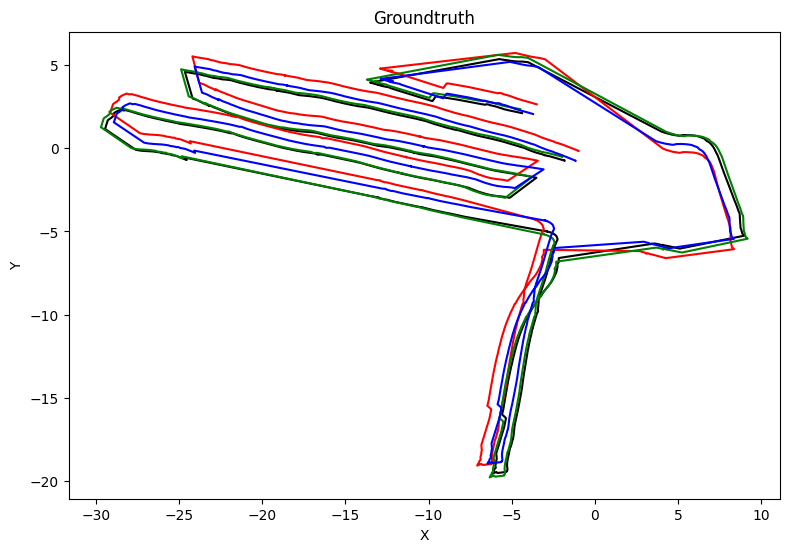

In [19]:
%matplotlib inline
fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
begin = 0
end = -1
ax.plot(Pose_lidar_arr[begin:end,0,3],Pose_lidar_arr[begin:end,1,3], color='black')
ax.plot(Prism_corrected_arr[begin:end,0,0],Prism_corrected_arr[begin:end,1,0], color='red')
ax.plot(Prism_corrected_arr[begin:end,0,1],Prism_corrected_arr[begin:end,1,1], color='green')
ax.plot(Prism_corrected_arr[begin:end,0,2],Prism_corrected_arr[begin:end,1,2], color='blue')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Groundtruth")
ax.set_aspect('equal')
fig.tight_layout() 

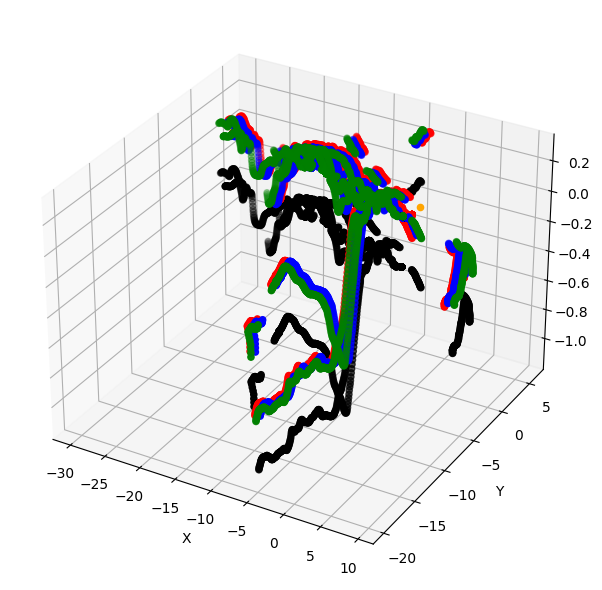

In [7]:
%matplotlib inline
fig = plt.figure(figsize = (8, 6))
ax = plt.axes(projection ="3d")
ax.scatter3D(Pose_lidar_arr[begin:end,0,3],Pose_lidar_arr[begin:end,1,3],Pose_lidar_arr[begin:end,2,3], color='black')
ax.scatter3D(Prism_corrected_arr[begin:end,0,0],Prism_corrected_arr[begin:end,1,0],Prism_corrected_arr[begin:end,2,0], color='red')
ax.scatter3D(Prism_corrected_arr[begin:end,0,1],Prism_corrected_arr[begin:end,1,1],Prism_corrected_arr[begin:end,2,1], color='green')
ax.scatter3D(Prism_corrected_arr[begin:end,0,2],Prism_corrected_arr[begin:end,1,2],Prism_corrected_arr[begin:end,2,2], color='blue')
ax.scatter3D(0,0,0, color='orange')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.tight_layout()

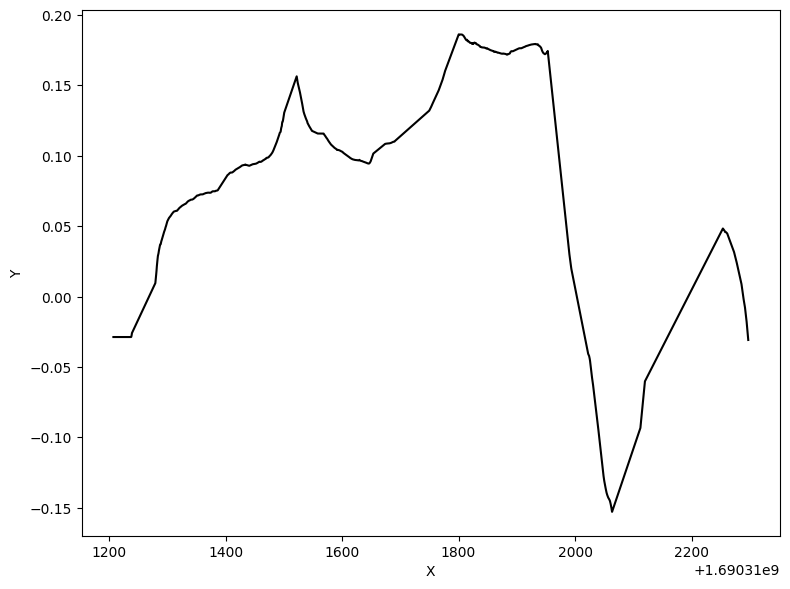

In [8]:
%matplotlib inline
fig = plt.figure(figsize = (8, 6))
ax = plt.axes()
ax.plot(list_lidar_time,Pose_lidar_arr[:,0,2], color='black')
ax.set_xlabel("X")
ax.set_ylabel("Y")
fig.tight_layout()

In [9]:
theodo_u = importlib.reload(theodo_u)
theodo_u.grountruth_GP_convert_for_eval(list_lidar_time, Pose_lidar, path+"ground_truth/groundtruth_rts_lidar.csv")

Conversion done !
